# Regresión Lineal Desde una Perspectiva Probabilística

![BLR](https://upload.wikimedia.org/wikipedia/commons/e/ed/Residuals_for_Linear_Regression_Fit.png)

> Al día de hoy todos debemos haber ajustado una línea recta (plano, o hiperplano) $f(x) = x^T w$ a un conjunto de puntos $\{(x_i, y_i)\}_{i=1}^{N}$, con $x_i\in\mathbb{R}^{d}$ y $y_i\in\mathbb{R}$, y parámetros $w\in\mathbb{R}^{d}$. Esto normalmente se hace bajo el enfoque de mínimos cuadrados, es decir:
>
> $$
  \hat{w} = \arg \min_{w} ||y - Xw||^2,
  $$
  
> donde 
> 
> $$
  X = \left[\begin{array}{ccc}
  - & x_1^T  & - \\
  - & x_2^T  & - \\
    & \vdots &   \\
  - & x_N^T  & - \\
  \end{array}\right] \in \mathbb{R}^{N \times d}, \qquad y = \left[\begin{array}{ccc}
  y_1 \\
  y_2 \\
  \vdots \\
  y_N \\
  \end{array}\right] \in \mathbb{R}^{N}.
  $$

> Adicionalmente, para evitar el fenómeno de overfitting, una práctica común es incluir un término de regularización penalizando el tamaño de los parámetros $w$:
>
> $$
  \hat{w} = \arg \min_{w} ||y - Xw||^2 + \lambda ||w||^2
  $$

> Pues bien, hoy veremos cómo se explica todo esto desde una perspectiva probabilística.

> **Objetivos:**
> - Explicar la regresión lineal por mínimos cuadrados regularizada desde una perspectiva probabilística.

> **Referencias:**
> 
> - Bayesian Methods for Machine Learning course, HSE University, Coursera.

## 1. Distribución normal

Antes de entrar en detalles repasemos un poco la distribución normal.

### 1.1. Distribución normal univariada

Se dice que una VA distribuye normal si su función de densidad de probabilidad es:

$$
\mathcal{N}(x|\mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left\{-\frac{(x - \mu)^2}{2 \sigma^2}\right\}
$$

con parámetros $\mu \in \mathbb{R}$: media de la VA X, y $\sigma^2 \in \mathbb{R}$: varianza de la VA X.

**Ejercicio.** Demostrar que:

1. 
$$
\int_{-\infty}^{\infty} \mathcal{N}(x|\mu, \sigma^2) = 1.
$$

2. 
$$
\mu = \arg \max_{x} \mathcal{N}(x|\mu, \sigma^2)
$$

¿Cómo luce esta densidad?

In [1]:
# Importar scipy.stats
from scipy import stats
# Importar numpy
import numpy as np
# Importar matplitlib.pyplot
from matplotlib import pyplot as plt

In [2]:
# Tres VA normales
X = stats.norm(loc=0, scale=1)
Y = stats.norm(loc=1, scale=1)
Z = stats.norm(loc=0, scale=2)

In [3]:
# Vector x para graficar
x = np.linspace(-6, 6, 100)

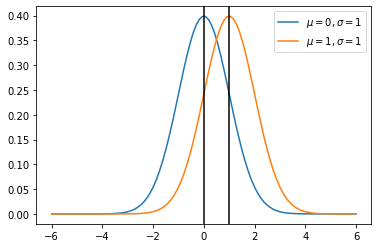

In [4]:
# Graficar
fig, ax = plt.subplots(1, 1)
ax.plot(x, X.pdf(x), label=r"$\mu=0, \sigma=1$")
ax.plot(x, Y.pdf(x), label=r"$\mu=1, \sigma=1$")
ax.axvline(x=0, color='k')
ax.axvline(x=1, color='k')
ax.legend()
plt.show()

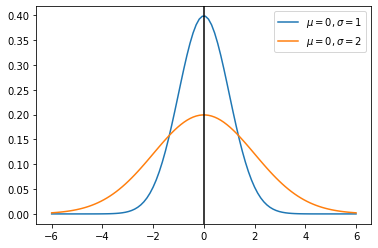

In [5]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, X.pdf(x), label=r"$\mu=0, \sigma=1$")
ax.plot(x, Z.pdf(x), label=r"$\mu=0, \sigma=2$")
ax.axvline(x=0, color='k')
ax.legend()
plt.show()

### 1.2. Distribución normal multivariada

Haciendo una extensión natural de lo anterior a vectores, obtenemos la función de densidad de probabilidad para distribución normal multivariada:

$$
\mathcal{N}(x|\mu, \sigma^2) = \frac{1}{\sqrt{\det(2 \pi \Sigma)}} \exp \left\{-\frac{1}{2}(x - \mu)^T \Sigma^{-1} (x - \mu)\right\},
$$

con parámetros $\mu \in \mathbb{R}^n$: vector de medias de la VA X y $\Sigma \in \mathbb{R}^{n \times n}$: matriz de covarianzas de la VA X (simétrica y definida positiva).

¿Cómo luce esta densidad?

In [6]:
# VA normales
X = stats.multivariate_normal(mean=np.zeros(2),
                              cov=np.eye(2))
Y = stats.multivariate_normal(mean=np.array([2, 3]),
                              cov=np.array([[1, 0.2],
                                            [0.8, 2]]))

In [7]:
from mpl_toolkits import mplot3d

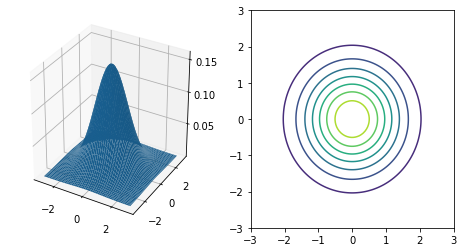

In [8]:
# Gráfico
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
x, y = np.meshgrid(x, y)
z = X.pdf(np.dstack([x, y]))
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x, y, z)
ax2 = fig.add_subplot(122)
ax2.contour(x, y, z)
plt.show()

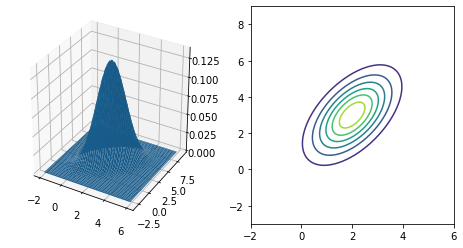

In [9]:
# Gráfico
x = np.linspace(-2, 6, 100)
y = np.linspace(-3, 9, 100)
x, y = np.meshgrid(x, y)
z = Y.pdf(np.dstack([x, y]))
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x, y, z)
ax2 = fig.add_subplot(122)
ax2.contour(x, y, z)
plt.show()

## 2. Regresión lineal desde una perspectiva probabilística

Para ver algunos fundamentos de regresión lineal ver la introducción de este cuaderno.

Desde una perspectiva Bayesiana, podemos representar las VA objetivo $y$ y parámetros $w$, datos $X$ de un modelo lineal $y=Xw$ como:

![lr](figures/linear_regression.png)

¿Cuál es la factorización que induce este modelo?

$$
P(y, w, X) = ?
$$

Como no nos interesa modelar los datos, sino los parámetros, estudiamos la distribución posterior $P(w | X, y)$, la cual se puede reescribir como:

$$
P(w | X, y) = \frac{P(y, w | X)}{P(y | X)}.
$$

Por otra parte, usando la definición de probabilidad condicional y la factorización inducida, tenemos que:

$$
P(y, w | X) = P(y | X, w) P(w),
$$

de donde

$$
P(w | X, y) = \frac{P(y, w | X)}{P(y | X)} = \frac{P(y | X, w) P(w)}{P(y | X)}.
$$

Las distribuciones posteriores son en general difíciles de encontrar exactamente, dada la complejidad de modelar la distribución de evidencia $P(y | X)$. Durante el curso estaremos viendo técnicas para encontrarlas tanto de manera exacta (cuando sea posible analíticamente) como de manera aproximada.

Para este ejercicio, una suposición plausible es que la función de verosimilitud $P(y | X, w)$ y la distribución previa $P(w)$ son distribuciones normales de la forma:

$$
P(y | X, w) = \mathcal{N}(y | X w, \sigma^2 I),
$$

$$
P(w) = \mathcal{N}(w | 0, \gamma^2 I),
$$

mientras que la evidencia la podemos pensar como un factor de normalización (para que la distribución posterior integre a 1). En general nos interesa encontrar la **distribución posterior**, sin embargo, para este ejemplo, encontraremos sólo **la moda** de la misma.

De modo que para encontrar el valor más probable de los parámetros según la evidencia de los datos y el objetivo, hacemos:

$$
\arg \max_{w} P(w | X, y) = \arg \max_{w} \frac{P(y, w | X)}{P(y | X)} = \arg \max_{w} P(y, w | X) = \arg \max_{w} P(y | X, w) P(w)
$$

___
**Propiedad de los logaritmos:** dado que el logaritmo es una función creciente,

$$
\arg \max_x f(x) = \arg \max_x \log f(x) = \arg \min_x - \log f(x)
$$
___

Así que el anterior problema lo podemos reescribir como:

$$
\arg \min_w -\log P(y | X, w) - \log P(w)
$$

Desarrollando los logaritmos <font color=green>en el pizarrón</font>:

\begin{align}
-\log P(y | X, w) - \log P(w) & = \dots \\
                              & = \dots \\
                              & = \dots \\
                              & = \log C + \frac{1}{2\sigma^2} (y - X w)^T (y - X w) + \frac{1}{2\gamma^2} w^T w \\
                              & = \log C + \frac{1}{2\sigma^2} ||y - X w||^2 + \frac{1}{2\gamma^2} ||w||^2
\end{align}

Finalmente, podemos resolver el problema 

$$
\arg \min_w ||y - X w||^2 + \lambda ||w||^2,
$$

con $\lambda = \frac{\sigma^2}{\gamma^2}$. <font color=green> Interpretación de $\lambda$</font>.

Se puede demostrar que la solución es:

$$
w^{*}_{reg} = (X^T X + \lambda I)^{-1} X^T y
$$

**Ejemplo:** Usar mínimos cuadrados regularizados para ajustar una recta (plano) a los datos de precios de casas en Portland, OR.

1. Usando scipy.optimize.minimize

In [10]:
# Importar pandas
import pandas as pd
# Importar scipy.optimize.minimize
from scipy.optimize import minimize

In [11]:
# Leer datos
data = pd.read_csv("housing_prices.csv", low_memory=False)
X = data[["size", "n_bedrooms"]]
y = data["price"] / 100000  # Precios en cientos de miles de dólares

In [12]:
# Buena práctica: normalizar los datos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xt = scaler.fit_transform(X)

In [13]:
# Función objetivo
def sq_reg(w, X, y, reg_coeff):
    # Dimensiones
    N, d = X.shape
    # Aumentar X para el término de bias
    Xa = np.concatenate((np.ones((N, 1)), X), axis=1)
    # Función objetivo
    return np.linalg.norm(y - Xa.dot(w), 2)**2 + reg_coeff * np.linalg.norm(w, 2)**2

In [14]:
# Parámetro inicial
w0 = np.zeros(3)

In [15]:
# Solución
lr_ridge = minimize(fun=sq_reg,
                    x0=w0,
                    args=(Xt, y, 0.01))

In [16]:
lr_ridge

      fun: 19.33470672453699
 hess_inv: array([[ 1.06362733e-02, -4.30742104e-06,  3.46984290e-06],
       [-4.30742104e-06,  1.55694290e-02, -8.73565998e-03],
       [ 3.46984290e-06, -8.73565998e-03,  1.55421031e-02]])
      jac: array([-9.53674316e-07,  1.19209290e-06, -2.38418579e-06])
  message: 'Optimization terminated successfully.'
     nfev: 45
      nit: 7
     njev: 9
   status: 0
  success: True
        x: array([ 3.40340246,  1.09412748, -0.06557336])

2. Usando sklearn.linear_model.Ridge

In [17]:
# Importar sklearn.linear_model.Ridge
from sklearn.linear_model import Ridge
# Importar sklearn.pipeline.Pipeline
from sklearn.pipeline import Pipeline

In [18]:
# Scaler-regressor pipeline
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", Ridge(alpha=0.01))
])

In [29]:
# Aprendizaje
pipe.fit(X=X, y=y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('regressor',
                 Ridge(alpha=0.01, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [30]:
pipe.named_steps["regressor"].intercept_, pipe.named_steps["regressor"].coef_

(3.404126595744681, array([ 1.09412745, -0.06557332]))

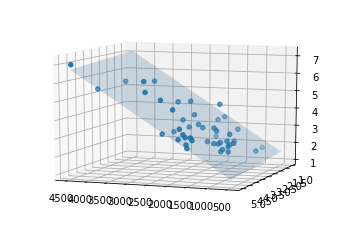

In [42]:
# Gráfico
plt3d = plt.figure().gca(projection='3d')

xx1, xx2 = np.meshgrid(np.linspace(500, 4500), np.linspace(1, 5, 5))
yp = pipe.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
plt3d.plot_surface(xx1, xx2, yp, alpha=0.2)
plt3d.scatter(X['size'], X['n_bedrooms'], y);
plt3d.view_init(elev=10, azim=110)

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>